Importação das bibliotecas necessárias

In [28]:
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns # visualização gráfica
import matplotlib.pyplot as plt # visualização gráfica
import time # definição do intervalo de tempo entre gráficos com animação
import statsmodels.api as sm # estimação de modelos
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import pickle

Importando banco de dados disponibilizado pela Indicum.

In [2]:
dado = pd.read_csv('desafio_indicium_imdb.csv',encoding = "utf-8")

Retirando oservações imcompletas, NAN


In [3]:
dado = dado.dropna()

Apagando a coluna Unnamed

In [4]:
dado = dado.drop('Unnamed: 0', axis = 1)

Retirando string "min" da coluna runtime para classificar como floatRretirando virgula dos valores gross para classificar como float

In [5]:
dado['Runtime'] = dado['Runtime'].str.replace('min', '', regex=False)
dado['Gross'] = dado['Gross'].str.replace(',', '', regex=False)

Corrigindo a escrita dos certificados 

In [6]:
dado['Certificate'] = dado['Certificate'].str.replace('Approved', 'A', regex=False)
dado['Certificate'] = dado['Certificate'].str.replace('GP', 'PG', regex=False)
dado['Certificate'] = dado['Certificate'].str.replace('TV-PG', 'PG', regex=False)
dado['Certificate'] = dado['Certificate'].str.replace('U/A', 'UA', regex=False)
dado['Certificate'] = dado['Certificate'].str.replace('PG-13', 'PGTREZE', regex=False)

In [7]:
dado.drop(965, axis=0, inplace = True) 

Ajustando o tipo de variável

In [8]:
dado['Released_Year'] = dado['Released_Year'].astype('float')
dado['Certificate'] = dado['Certificate'].astype('category')
dado['Runtime'] = dado['Runtime'].astype('float')
dado['IMDB_Rating'] = dado['IMDB_Rating'].astype('float')
dado['Meta_score'] = dado['Meta_score'].astype('float')
dado['No_of_Votes'] = dado['No_of_Votes'].astype('float')
dado['Gross'] = dado['Gross'].astype('float')

# TRABALHANDO COM A COLUNA OVERVIEW
# Primeiro limpando a coluna, retirando pontuação e deixando todas as palavras minúsculas.
# Insights sobre a coluna Overview

In [9]:
dado['Overview'] = dado['Overview'].str.lower()
dado['Overview'] = dado['Overview'].str.replace('.', '', regex=False)
dado['Overview'] = dado['Overview'].str.replace(',', '', regex=False)

Stopwords são palavras que não agregam sentido em uma ideia (neste caso frase).
Para identificar as palavras principais, as Stopwords são retiradas.
Primeiro, selecionar todas as Stopwords do idioma Inglês.

In [10]:
stop_words = set(stopwords.words('english'))

Juntando todas as Overviews em uma string apenas, chamada overview_completo

In [11]:
overview_coluna = dado['Overview']
overview_completo = ' '.join(overview_coluna.astype(str))

Retirando as stopwords e salvando o resultado em uma string novamente.
O resultado contém palavras-chave que dão a ideia principal da overview.

In [12]:
palavras_overview = overview_completo.split()
overview = [word for word in palavras_overview if word not in stop_words]
overview_string = " ".join(overview)

Nuvem de palavras com as principais palavras do overview, que aparecem com mais frequência.

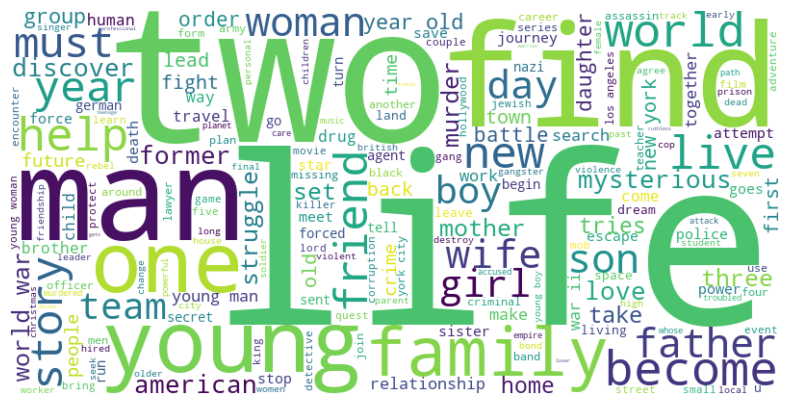

In [13]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(overview_string)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # Oculta os eixos
plt.show()

O insight que pode ser obtido da cdoluna overview é que as palavras que mais aparecem para descrever filmes são:
# Two (dois), find (descoberta), man (homem), one (um), life (vida), young (jovem), family (familia), friend (amigo), world (mundo), 
# become (tornar-se), world war (guerra mundial), mistery (mistério), help (ajuda), entre outras.

Também foi feito o mesmo para o gênero do filme.
No caso da coluna Genre não necessário retirar stopwords.

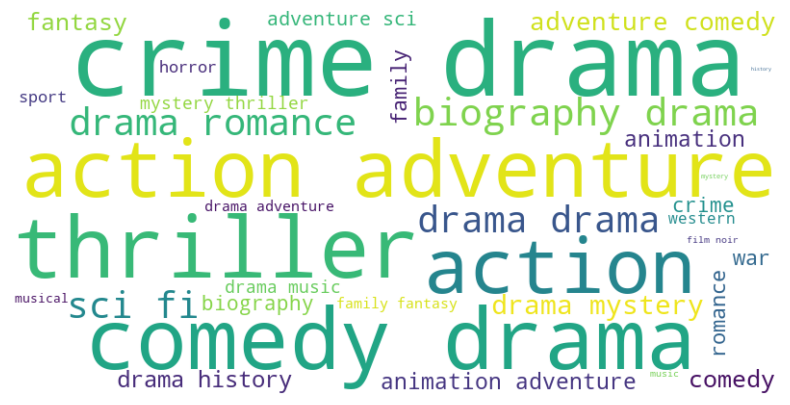

In [14]:
dado['Genre'] = dado['Genre'].str.lower()
dado['Genre'] = dado['Genre'].str.replace('.', '', regex=False)
dado['Genre'] = dado['Genre'].str.replace(',', '', regex=False)

genero_coluna = dado['Genre']
genero_completo = ' '.join(genero_coluna.astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genero_completo)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # Oculta os eixos
plt.show()


# A partir, apenas da nuvem Overview, não é seguro afirmar o gênero do filme. Depende do contexto que a palavra está inserida. Uma única palavra não revela contexto.

# A partir da nuvem de palavras Genre pode-se notar que a maioria dos filmes são drama, crime, ação, biogtafia, romance, comédia, suspense e aventura.

# Análise Exploratória dos dados

In [70]:
imdb_certificado = dado.groupby('Certificate')['IMDB_Rating'].describe().reset_index()
imdb_certificado

C:\Users\Alessandra\AppData\Local\Temp\ipykernel_1736\2401632136.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  imdb_certificado = dado.groupby('Certificate')['IMDB_Rating'].describe().reset_index()


,Certificate,count,mean,std,min,25%,50%,75%,max
0,A,179.0,7.994413,0.337825,7.6,7.7,8.00,8.20,9.2
1,G,9.0,8.022222,0.334581,7.7,7.7,8.00,8.30,8.5
2,PG,21.0,7.895238,0.188351,7.6,7.8,7.90,8.00,8.3
3,PGTREZE,38.0,7.784211,0.176339,7.6,7.6,7.75,7.90,8.3
4,Passed,9.0,8.044444,0.206828,7.6,8.0,8.10,8.20,8.3
5,R,131.0,7.866412,0.228578,7.6,7.7,7.80,8.00,8.6
6,U,182.0,7.960989,0.285497,7.6,7.7,7.90,8.10,9.0
7,UA,143.0,7.927273,0.290017,7.6,7.7,7.90,8.05,9.0


Para uma pessoa que eu não conheço, eu indicaria algum dos 10 filmes que possuem maior número de votos. Abaixo seguem eles: 

In [68]:
df_ordenado = dado.sort_values(by='No_of_Votes', ascending = False)
df_ordenado.head(10)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,fitted_value,eij
1,The Dark Knight,2008.0,UA,152.0,action crime drama,9.0,when the menace known as the joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232.0,534858444.0,8.983647,0.016353
7,Inception,2010.0,UA,148.0,action adventure sci-fi,8.8,a thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042.0,292576195.0,8.794850,0.005150
8,Fight Club,1999.0,A,139.0,drama,8.8,an insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740.0,37030102.0,8.703099,0.096901
5,Pulp Fiction,1994.0,A,154.0,crime drama,8.9,the lives of two mob hitmen a boxer a gangster...,94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188.0,107928762.0,8.855871,0.044129
10,Forrest Gump,1994.0,UA,142.0,drama romance,8.8,the presidencies of kennedy and johnson the ev...,82.0,Robert Zemeckis,Tom Hanks,Robin Wright,Gary Sinise,Sally Field,1809221.0,330252182.0,8.740289,0.059711
13,The Matrix,1999.0,A,136.0,action sci-fi,8.7,when a beautiful stranger leads computer hacke...,73.0,Lana Wachowski,Lilly Wachowski,Keanu Reeves,Laurence Fishburne,Carrie-Anne Moss,1676426.0,171479930.0,8.632811,0.067189
9,The Lord of the Rings: The Fellowship of the Ring,2001.0,U,178.0,action adventure drama,8.8,a meek hobbit from the shire and eight compani...,92.0,Peter Jackson,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,1661481.0,315544750.0,8.808722,-0.008722
4,The Lord of the Rings: The Return of the King,2003.0,U,201.0,action adventure drama,8.9,gandalf and aragorn lead the world of men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758.0,377845905.0,8.833523,0.066477
0,The Godfather,1972.0,A,175.0,crime drama,9.2,an organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367.0,134966411.0,8.882053,0.317947
62,The Dark Knight Rises,2012.0,UA,164.0,action adventure,8.4,eight years after the joker's reign of anarchy...,78.0,Christopher Nolan,Christian Bale,Tom Hardy,Anne Hathaway,Gary Oldman,1516346.0,448139099.0,8.526305,-0.126305


Abaixo são mostrados boxplots da variável IMDB_Rating sem separar por Certificado.

<Axes: ylabel='IMDB_Rating'>

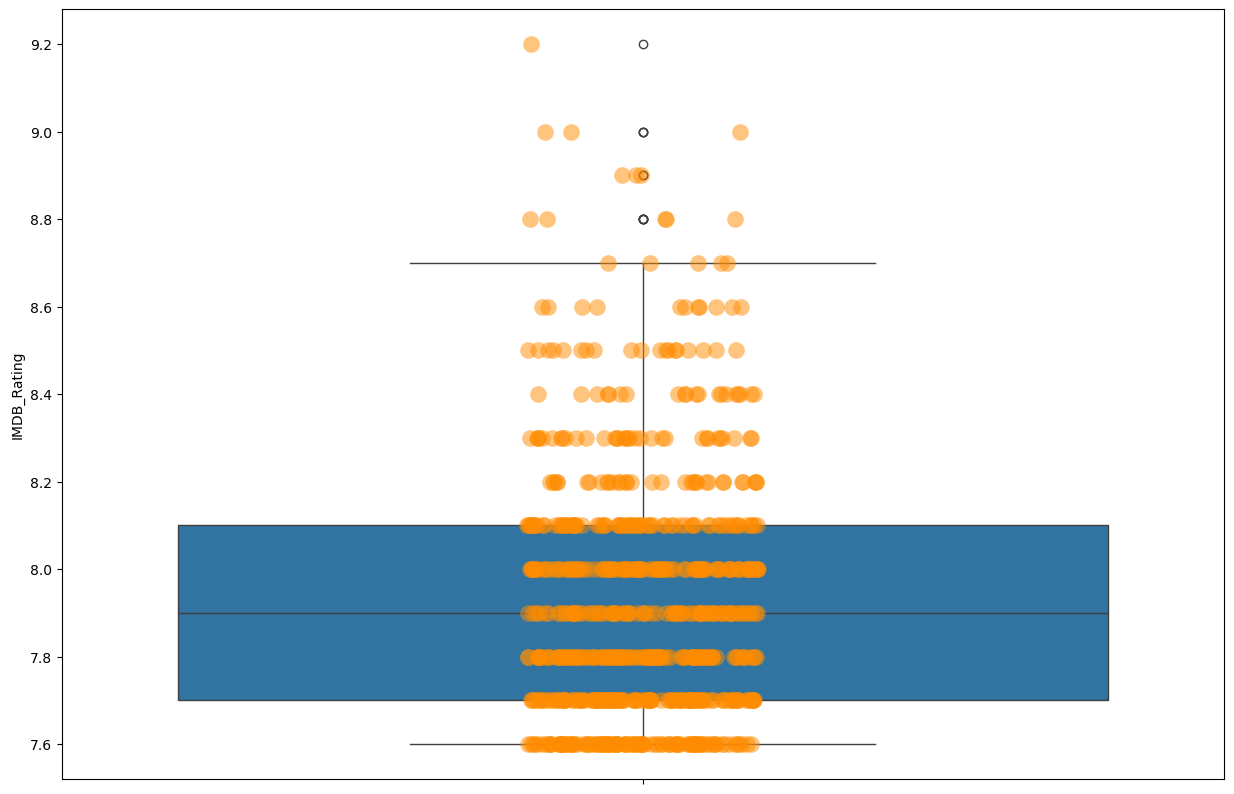

In [15]:
plt.figure(figsize = (15,10))
sns.boxplot(data = dado, y='IMDB_Rating')
sns.stripplot(data=dado, y='IMDB_Rating',
              color='darkorange', jitter=0.1, size=12, alpha=0.5)

Abaixo são mostrados boxplots da variável IMDB_Rating por Certificado.

<Axes: xlabel='Certificate', ylabel='IMDB_Rating'>

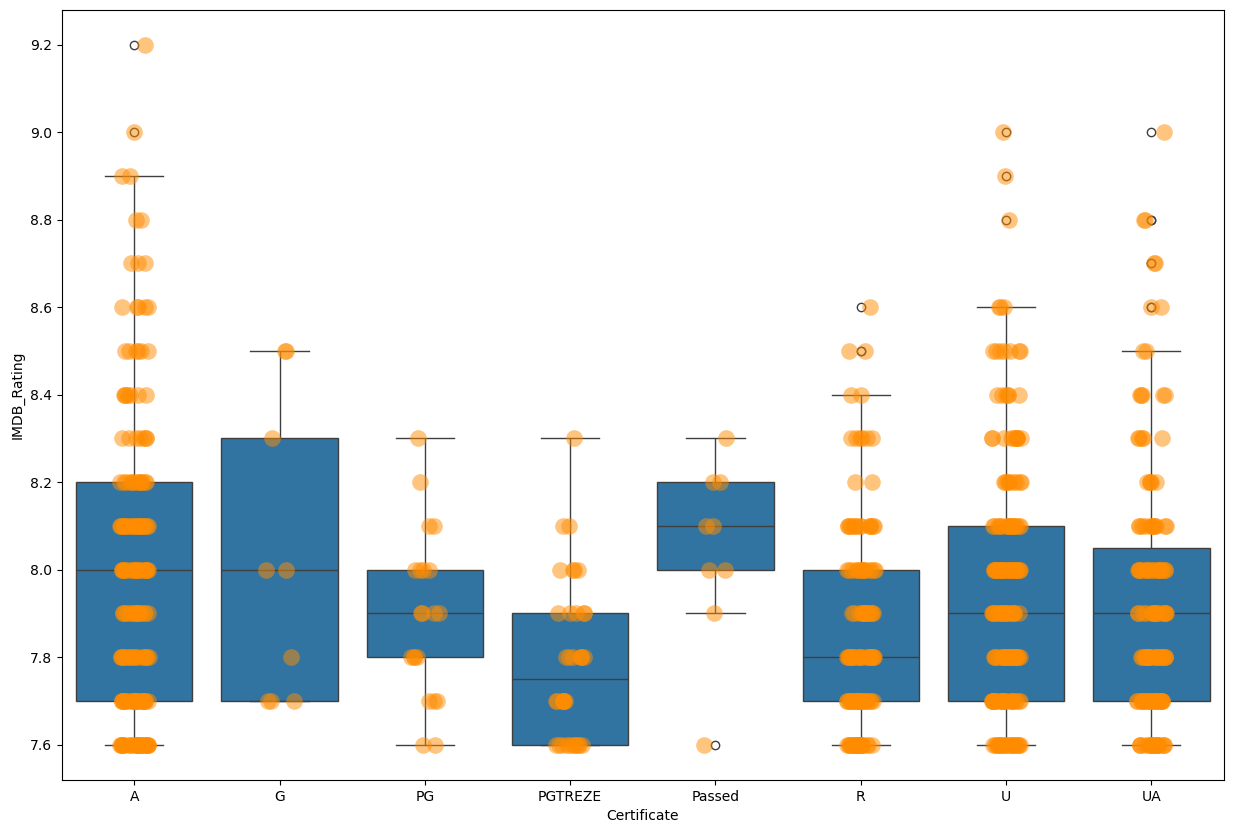

In [16]:
plt.figure(figsize = (15,10))
sns.boxplot(data = dado, x= 'Certificate', y='IMDB_Rating')
sns.stripplot(data=dado, x= 'Certificate', y='IMDB_Rating',
              color='darkorange', jitter=0.1, size=12, alpha=0.5)

Nota-se que há outliers na amostra, outliers por certificado. 
Outliers são amostras discrepantes, elas geralmente deturpam uma regressão.
Os pontos em laranja mostram a distribuição da amostra sobre o boxplot.
As notas de IMDB provavelmente variam de certificado por certificado, vale a pena averiguar se para prever a nota de IMDB deve-se considerar as diferenças por certificado.

A seguir é feito um mapa de calor, mostrando a intensidade das correlações de Pearson. A correlação de Pearson capta uma possível relação linear. NÃO SIGNIFICA CAUSA.

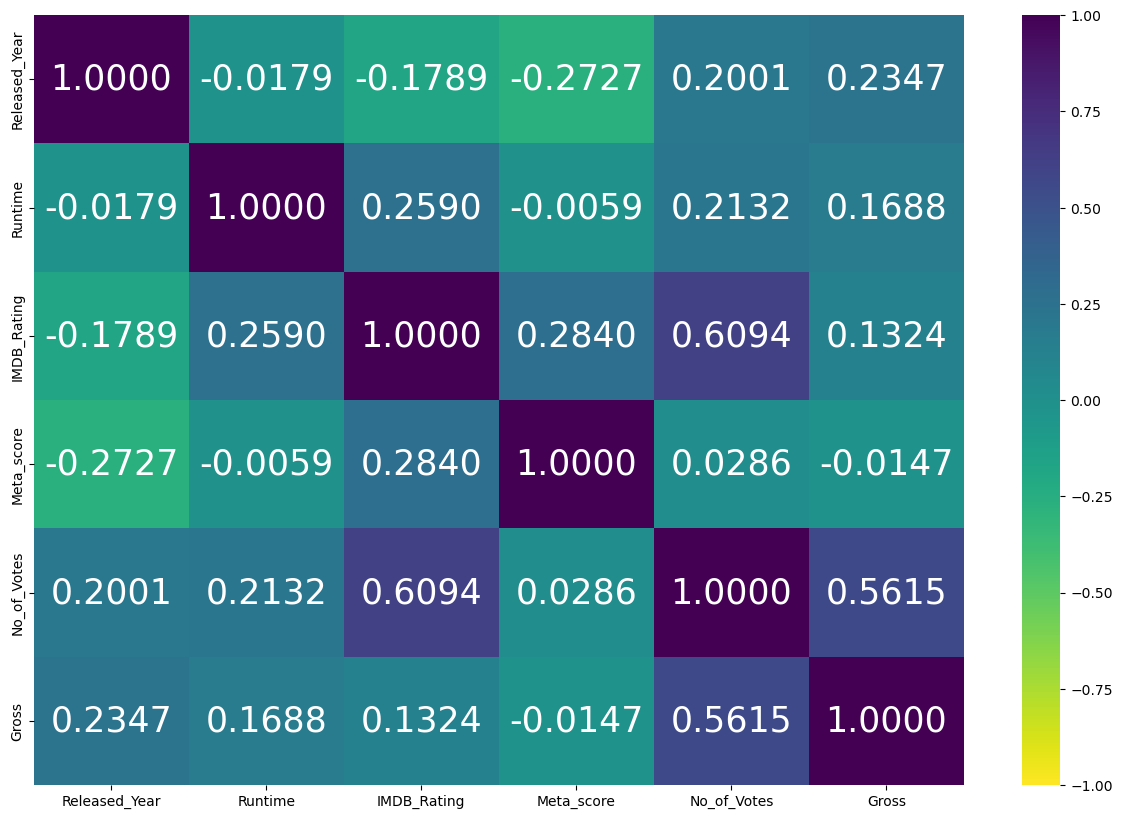

In [17]:

dado_filtrado = dado.drop(columns = ['Series_Title', 'Certificate','Genre', 'Overview','Director', 'Star1', 'Star2', 'Star3', 'Star4'])
correlation_matrix = dado_filtrado.iloc[:,0:6].corr()
correlation_matrix

# Mapa de calor com as correlações entre todas as variáveis quantitativas
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".4f",
                      cmap=plt.cm.viridis_r,
                      annot_kws={'size': 25}, vmin=-1, vmax=1)

O principal insight que pode-se notar por meio do mapa de calor é que há forte correlação positiva entre No_of_Votes e Gross. 
Se estas variáveis explicativas forem colocadas juntas no modelo gera problema de Multicolinearidade e faz com que os parâmetros da regressão não sejam confiáveis.
No entanto é possivel dizer que a expectativa de faturamento Gross está relacionada a variável número de votos.

Escolhi uma regressão para abordar o problema, pois para realizar previsão de dados que não estão na amostra, é necessário método supervisionado. 
Se fosse escolhido classificação (não-supervisionado) a cada nova observação teria que refazer o modelo. Na minha concepção regressão é mais adequado para previsão.
Abaixo serão apresentados os passos para um modelo GLMM (Generalized Linear Multilevel Model). 
A variável dependente será IMDB_Rating e testadas como explicativas serão No_of_Votes, Runtime,  Released_Yea,  Meta_scor.e
É um tipo de modelo que considera que os dados estão agrupados, neste caso os grupos seriam os certificados.
Significa que dependendo da classificação quanto a certificado, haverá diferença no IMDB_Rating.

Primeiro testando se inserção do contexto faz diferença no modelo. 
Não há inserção de variáveis explicativas, por isso é chamado de modelo nulo 

In [18]:
modelo_nulo_hlm2 = sm.MixedLM.from_formula(formula='IMDB_Rating ~  1',
                                                       groups='Certificate',
                                                       re_formula='1',
                                                       data=dado).fit()

# Parâmetros do 'modelo_nulo_hlm2'
modelo_nulo_hlm2.summary()


C:\Users\Alessandra\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
          Mixed Linear Model Regression Results
==========================================================
Model:             MixedLM Dependent Variable: IMDB_Rating
No. Observations:  712     Method:             REML       
No. Groups:        8       Scale:              0.0809     
Min. group size:   9       Log-Likelihood:     -122.7030  
Max. group size:   182     Converged:          Yes        
Mean group size:   89.0                                   
----------------------------------------------------------
                Coef. Std.Err.    z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept       7.926    0.028 286.926 0.000  7.872  7.980
Certificate Var 0.004    0.012                            
==========================================================

"""

A variância Certificate é significativa, então contexto faz diferença. 
Há efeitos aleatorios de intercepto

Foram testadas diversas combinações de inserção efeito aleatório de inclinação, na parte (re_formula). Nenhuma variância de efeito aleatório foi siginificativa em nível de 95% de confiança. Então o mdelo final inclui apenas com efeitos aleatórios de intercepto.

Abaixo a modelagem final GLMM com 2 níveis.

In [19]:
modelo_final_hlm2 = sm.MixedLM.from_formula(formula='IMDB_Rating ~ No_of_Votes + Runtime + \
                                                 Released_Year + Meta_score',
                                                       groups='Certificate',
                                                       re_formula='1',
                                                       data=dado).fit()

modelo_final_hlm2.summary()


C:\Users\Alessandra\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
          Mixed Linear Model Regression Results
==========================================================
Model:             MixedLM Dependent Variable: IMDB_Rating
No. Observations:  712     Method:             REML       
No. Groups:        8       Scale:              0.0396     
Min. group size:   9       Log-Likelihood:     96.4574    
Max. group size:   182     Converged:          Yes        
Mean group size:   89.0                                   
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept       14.599    0.920 15.873 0.000 12.796 16.401
No_of_Votes      0.000    0.000 22.788 0.000  0.000  0.000
Runtime          0.001    0.000  4.867 0.000  0.001  0.002
Released_Year   -0.004    0.000 -8.151 0.000 -0.005 -0.003
Meta_score       0.005    0.001  7.277 0.000  0.003  0.006
Certificate Var  0.001    0.005                           
==========================================================

"""

Na modelagem a variável Gross não entrou no modelo devido a alta correlação com No_of_Votes.

Abaixo são mostrados os gráficos sobre o ajuste, considerando um ajuste por certificado. 

Gráfico IMDB_Rating (variável independente) versus No_of_Votes (variável explicativa)
por certificação 

Salvando os resíduos e fitted_values no dataframe

In [21]:
dado['fitted_value'] = modelo_final_hlm2.fittedvalues
dado['eij'] = modelo_final_hlm2.resid

In [ ]:
#Gráfico IMDB_Rating (variável independente) versus No_of_Votes (variável explicativa)
#por certificação 

In [ ]:
c = dado['Certificate'].unique()

while True:
    
    for certificado in c:
        data = dado[dado['Certificate']== certificado]
                    
        fig, ax = plt.subplots()
        
        sns.regplot(x='No_of_Votes', y='IMDB_Rating', data=data,
                    ax=ax, ci=False, color = 'red', fit_reg=False)
        sns.regplot(x='No_of_Votes', y='fitted_value', data=data,
                    ax=ax, ci=False, color = 'blue', fit_reg=False)
        
        plt.title(f"Certificado {certificado}, Azul IMDB Fitted, Vermelho IMDB Real ", fontsize=12)
        plt.xlabel('No_of_Votes', fontsize=10)
        plt.ylabel('IMDB_Rating', fontsize=10)
        plt.tick_params(axis='x', labelsize=8)
        plt.tick_params(axis='y', labelsize=8)
        plt.tight_layout()
        plt.show()

        # Intervalo de tempo entre os gráficos
        time.sleep(1)
    

In [ ]:
# IMDB_Rating Fitted versus IMDB_Rating Real 

In [ ]:
c = dado['Certificate'].unique()

while True:
    
    for certificado in c:
        data = dado[dado['Certificate']== certificado]
                    
        fig, ax = plt.subplots()
        
        sns.regplot(x='IMDB_Rating', y='fitted_value', data=data,
                    ax=ax, ci=False, color = 'red', fit_reg=False)
        
        plt.title(f"Certificado {certificado}", fontsize=12)
        plt.xlabel('IMDB_Rating Real', fontsize=10)
        plt.ylabel('IMDB_Rating fitted', fontsize=10)
        plt.tick_params(axis='x', labelsize=8)
        plt.tick_params(axis='y', labelsize=8)
        plt.tight_layout()
        plt.show()

        # Intervalo de tempo entre os gráficos
        time.sleep(1)
    

Gráfico IMDB_Rating Fitted versus resíduo do ajuste

In [ ]:
c = dado['Certificate'].unique()

while True:
    
    for certificado in c:
        data = dado[dado['Certificate']== certificado]
                    
        fig, ax = plt.subplots()
        
        sns.regplot(x='fitted_value', y='eij', data=data,
                    ax=ax, ci=False, color = 'red', fit_reg=False)
        
        plt.title(f"Certificado {certificado}", fontsize=12)
        plt.xlabel('IMDB_fitted', fontsize=10)
        plt.ylabel('Resíduo', fontsize=10)
        plt.tick_params(axis='x', labelsize=8)
        plt.tick_params(axis='y', labelsize=8)
        plt.tight_layout()
        plt.show()

        # Intervalo de tempo entre os gráficos
        time.sleep(1)
    

Métricas da qualidade do ajuste

In [27]:
mape = mean_absolute_percentage_error(dado['IMDB_Rating'],dado['fitted_value'])
print(mape)

mae = mean_absolute_error(dado['IMDB_Rating'],dado['fitted_value'])
print(mae)

0.019607449848999002
0.15608435103341362
0.039135179839351324
0.19782613537991214
0.5305403836520406


Uma das métricas escolhidas é o MAPE (Erro Absoluto Percentual Médio), de fácil interpretação, pois é expresso em porcentagem.
Pela mesma razão foi escolhido MAE que é a média absoula dos erros para cada observação e seu valor predito.
Não escolhi o Rquadrado pois ele performa melhor em casos lineares, neste caso teria que investigar mais.

Salvando o modelo em .pkl

In [45]:
arquivo_pickle = "modelo_final_hlm2.sav"
pickle.dump(modelo_final_hlm2, open(arquivo_pickle, 'wb'))
print("\nModelo salvo usando a biblioteca Pickle")
print(f"Nome Arquivo: {arquivo_pickle}")


Modelo salvo usando a biblioteca Pickle
Nome Arquivo: modelo_final_hlm2.sav


In [43]:
carregando_modelo_pickle = pickle.load(open(arquivo_pickle, 'rb'))

Prevendo IMDB_Rating com os valores para variáveis explicativas a seguir:
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 micy.',
 'Meta_score':am Sadler',
 'No_of_Votes28,341,469'}


In [65]:
efeitos_aleatorios_certificado = pd.DataFrame(modelo_final_hlm2.random_effects).T
efeitos_aleatorios_certificado = efeitos_aleatorios_certificado.reset_index().rename(columns={'index': 'certificado'})
print(efeitos_aleatorios_certificado)

X = pd.DataFrame({'No_of_Votes':[2343110],'Runtime':[142],'Released_Year':[1994],'Meta_score':[80]})
print(X)

resultado_fixo = modelo_final_hlm2.predict(pd.DataFrame({'No_of_Votes':[2343110],'Runtime':[142],'Released_Year':[1994],'Meta_score':[80]}))
resultado_fixo

resultado_completo = resultado_fixo + efeitos_aleatorios_certificado['Certificate'][0]

resultado_completo

  certificado  Certificate
0           A    -0.023391
1           G     0.008143
2          PG     0.017918
3     PGTREZE     0.007063
4      Passed     0.002900
5           R     0.024414
6           U     0.020255
7          UA    -0.057302
   No_of_Votes  Runtime  Released_Year  Meta_score
0      2343110      142           1994          80


0    9.058456
dtype: float64

O IMDB será 9.058456